# Tweedie distribution
> A short introduction to the Tweedie distribution

- toc: true 
- badges: true
- comments: false
- categories: [insurance, distribution, glm, notebook]

# Introduction

The [Tweedie distribution](https://en.wikipedia.org/wiki/Tweedie_distribution) is a family of probability distributions that include
- [Normal](https://en.wikipedia.org/wiki/Normal_distribution)
- [Gamma](https://en.wikipedia.org/wiki/Gamma_distribution)
- [Inverse Gaussian](https://en.wikipedia.org/wiki/Inverse_Gaussian_distribution)
- [Poisson](https://en.wikipedia.org/wiki/Poisson_distribution)
- [Compound Poisson-gamma](https://en.wikipedia.org/wiki/Compound_Poisson_distribution#Compound_Poisson_Gamma_distribution)

The Tweedie distribution is wildly popular in insurance industry as a tool of modelling
- claim frequency (count data), 
- claim severity (non-negative continuous data), and 
- pure premium (non-negative continous data with a zero mass).

In this post, we give a brief introduction to the Tweedie distribution and its properties.

# Exponential Dispersion Models

Before diving into the Tweedie distribution, we need to understand the **exponential dispersion model (EDM)** {% cite jorgensen1987exponential %}, of which the Tweedie is a special case. 

A probability distribution is an **EDM** if the density/mass function has the following form

$$f(y) = c(y, \phi)\exp\left\{\frac{y\theta- a(\theta)}{\phi}\right\},$$
where $\theta$ is called the canonical parameter and $\phi$ the dispersion parameter. 

It can be shown that,
$$\mathbb{E}(y):=\mu = \dot{a}(\theta), \quad \mathrm{Var}(y)=\phi\ddot{a}(\theta)= \phi\ddot{a}(\dot{a}^{-1}(\mu))=\phi V(\mu)$$

where $\dot{a}$ and $\ddot{a}$ are the first and second derivative of $a$, respectively; $V(\mu)$ is called the variance function. 

# Tweedie Distribution

Now we formally introduce the Tweedie distribution. 
A Tweedie distribution $Tw_p(\mu, \phi)$  is an EDM with 

$$V(\mu) = \mu^p, $$
where $p\in \mathrm{R}$.


The Tweedie behaves differently when $p$ takes different values. 

We consider 5 cases.

## Normal ($p=0$)

When $p=0$, the Tweedie distribution becomes a normal distribution,

$$Tw_0(\mu, \phi) \to N(\mu, \sigma), $$ 

where $\mu=\mu, \phi=\sigma^2$.

In [1]:
# hide_input
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%load_ext lab_black

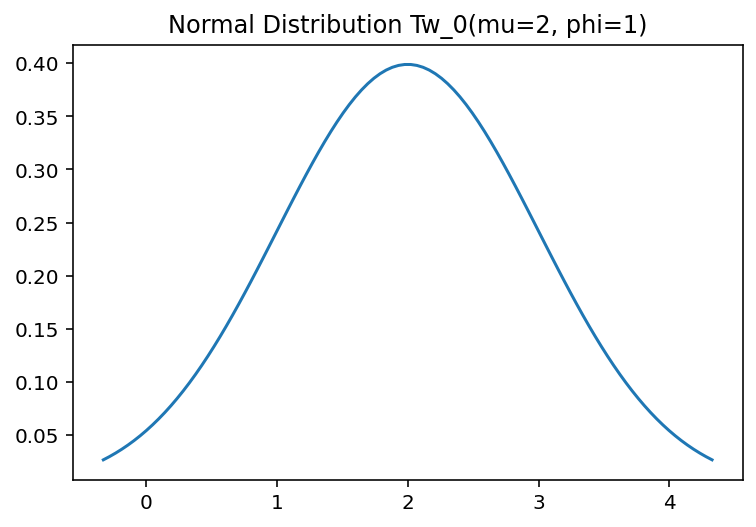

In [2]:
from scipy.stats import norm

mu = 2
sigma = 1

norm_dist = norm(loc=mu, scale=sigma)
x = np.linspace(norm_dist.ppf(0.01), norm_dist.ppf(0.99), 100)

plt.plot(x, norm_dist.pdf(x))
plt.title("Normal Distribution Tw_0(mu=2, phi=1)")
plt.show()

## Poisson ($p=1$)

When $p=1$, the Tweedie distribution becomes a Poisson distribution,

$$Tw_1(\mu, \phi) \to \mathrm{Poisson}(\lambda), $$ 

where $\mu=\lambda, \phi=1$.

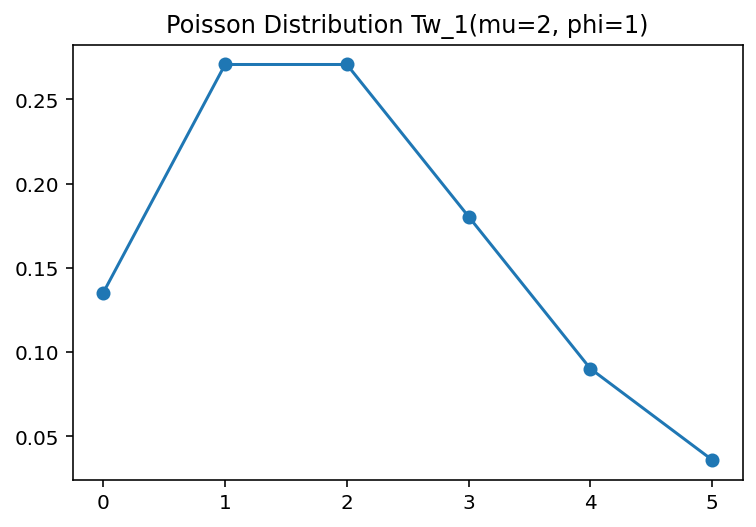

In [3]:
from scipy.stats import poisson

mu = 2

poisson_dist = poisson(mu=mu)
x = np.arange(poisson_dist.ppf(0.01), poisson_dist.ppf(0.99))

plt.plot(x, poisson_dist.pmf(x), marker="o")
plt.title("Poisson Distribution Tw_1(mu=2, phi=1)")
plt.show()

## Gamma Distribution ($p=2$)

When $p=1$, the Tweedie distribution becomes a Gamma distribution,

$$Tw_2(\mu, \phi) \to \mathrm{Gamma}(\alpha, \beta), $$ 

where $\alpha = 1/\phi, \beta = 1/(\phi\mu)$

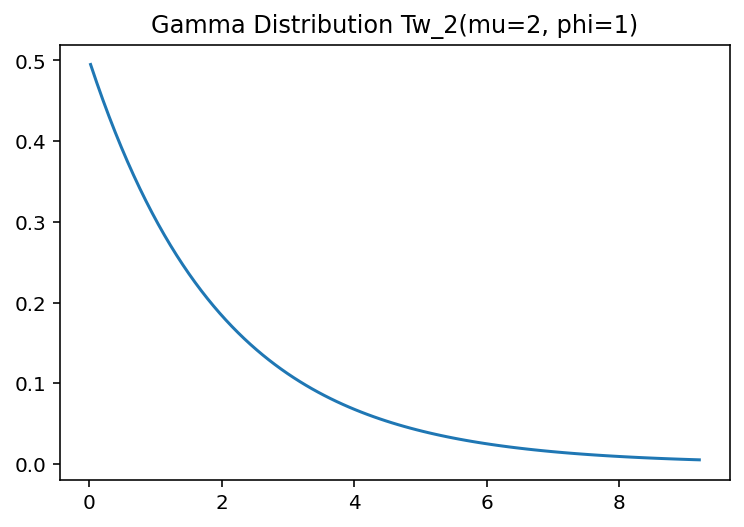

In [4]:
from scipy.stats import gamma

mu = 2
phi = 1

gamma_dist = gamma(a=1 / phi, scale=mu * phi)
x = np.linspace(gamma_dist.ppf(0.01), gamma_dist.ppf(0.99), 100)

plt.plot(x, gamma_dist.pdf(x))
plt.title("Gamma Distribution Tw_2(mu=2, phi=1)")
plt.show()

## Inverse Gaussian Distribution ($p=3$)

When $p=3$, the Tweedie distribution becomes a Inverse Gaussian Distribution,

$$Tw_3(\mu, \phi) \to \mathrm{IG}(\mu, \lambda), $$ 

where $\mu=\mu, \lambda = 1/\phi$.

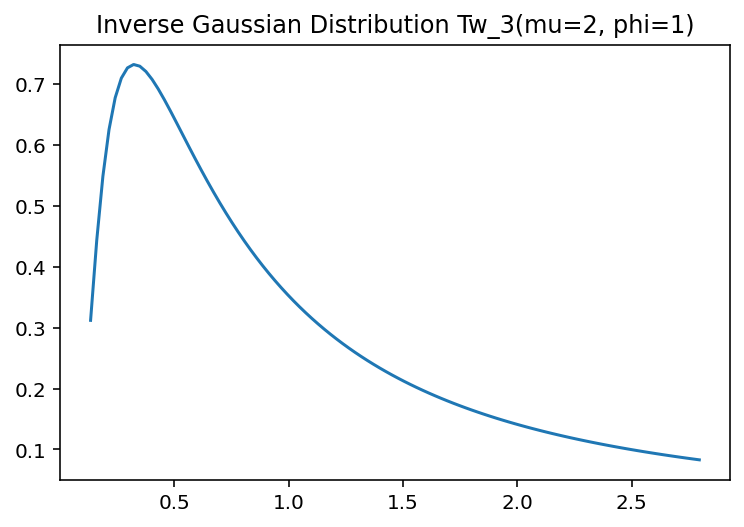

In [5]:
from scipy.stats import invgauss

mu = 2
phi = 1

invgauss_dist = invgauss(mu=mu, scale=1 / phi)
x = np.linspace(invgauss_dist.ppf(0.01), invgauss_dist.ppf(0.8), 100)

plt.plot(x, invgauss_dist.pdf(x))
plt.title(f"Inverse Gaussian Distribution Tw_3(mu={mu}, phi={phi})")
plt.show()

## Compound Poisson-Gamma ($1<p<2$)

When $1<p<2$, the Tweedie distribution gives rise to the most important distribution in the class, known as the
[Compound Poisson-Gamma Distribution](https://en.wikipedia.org/wiki/Compound_Poisson_distribution).

A compound Poisson-Gamma distribution is the distribution of a sum of i.i.d gamma distribution with the number of gamma following a Poisson distribution.

To illusrate the idea, let $N\sim \mathrm{Poisson}(\lambda)$, and $X_i\sim \Gamma(\alpha, \beta)$, $i=1,2,\dots,N$ be i.i.d gamma distributions. Then 
$$Y=\sum_{i=1}^N X_i$$
is a compound Poisson-Gamma distribution.

### Mean and Variance

To calculate the mean of $Y$, 

$$
\begin{array}{ll}
\mathbb{E}(Y) &=& \mathbb{E}(\mathbb{E}(Y|N)) &(\text{Law of Total Expectation})\\
              &=& \mathbb{E}(N\mathbb{E}(X_1))&(\text{i.i.d assumption})\\
              &=& \mathbb{E}(N\alpha/\beta)  &(\text{Mean of Gamma distribution})\\
              &=&\lambda\frac{\alpha}{\beta}  & (\text{Mean of Poisson distribution})
\end{array}
$$

To calculate the variance,

$$
\begin{array}{ll}
\mathrm{Var}(Y) &=& \mathrm{Var}(\mathbb{E}(Y|N)) + \mathbb{E}(\mathrm{Var}(Y|N))& (\text{Law of Total Variance})\\
                &=& \mathrm{Var}(N\mathbb{E}(X_1)) + \mathbb{E}(N\mathrm{Var}(X_1)) &(\text{i.i.d assumption})\\
                &=& \mathrm{Var}(N\alpha/\beta) + \mathbb{E}(N\alpha/\beta^2) & (\text{Mean and variance of Gamma distribution})\\
                &=&  \lambda\alpha^2/\beta^2 + \lambda\alpha/\beta^2 &(\text{Mean and variance of Poisson distribution})\\
                &=& \lambda \frac{\alpha(1+\alpha)}{\beta^2} & \\
\end{array}
$$



### Parameter Mapping

$$
\lambda =\frac{\mu^{2-p}}{(2-p)\phi}, \quad\alpha=\frac{2-p}{p-1},\quad  \beta= \frac{\mu^{1-p}}{(p-1)\phi}
$$


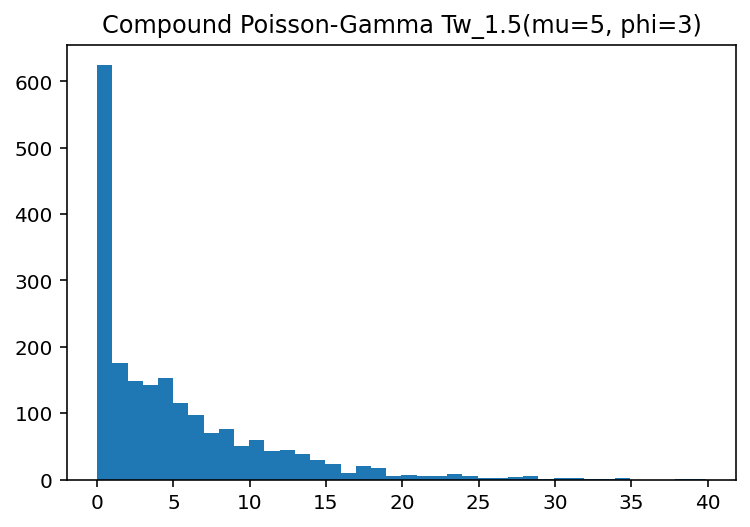

In [6]:
from scipy.stats import poisson, gamma

mu = 5
phi = 3
p = 1.5

n_sim = 2000

lam = mu ** (2 - p) / ((2 - p) * phi)
alpha = (2 - p) / (p - 1)
beta = mu ** (1 - p) / ((p - 1) * phi)
scale = 1 / beta  # as scipy.stats scale is 1/beta

rvs_poisson = poisson(lam).rvs(n_sim)

rvs_gamma = [gamma(a=alpha, scale=scale).rvs(rp).sum() for rp in rvs_poisson]

plt.hist(rvs_gamma, bins=40)
plt.title(f"Compound Poisson-Gamma Tw_{p}(mu={mu}, phi={phi})")
plt.show()

# Scale Invariance

The Tweedie distribution is [scale invariant](https://en.wikipedia.org/wiki/Scale_invariance), meaning $cY$ follows the same distribution as $Y$ for a positive constant $c$.

To be specific,

$$cTw_p(\mu, \phi) = Tw_p(c\mu, c^{2-p}\phi)$$

As a matter of fact, the Tweedie distribution is the only scale invariant family within EDMs {% cite jorgensen1997theory %}.

# Tweedie Deviance

Finally, we look at Tweedie deviance, a goodness-of-fit measure for the Tweedie family.

The deviance is defined as follows

$$
\begin{array}{ll}
\Delta &\equiv& 2(\check{l} - \hat{l}) \\
        &=& 2(\ln(p(y|\check{\theta}))-\ln(p(y|\hat{\theta})))\\
        &=&\sum_{i=1}^nd(y_i, \hat{\mu})
\end{array}
$$

where $\check{l}$ is the loglikehood of the [saturated model](https://stats.stackexchange.com/questions/283/what-is-a-saturated-model), $\hat{l}$ is the loglikehood of a fitted model and $d(\cdot, \cdot)$ is a unit deviance function.

For different $p$, the unit deviance is as follows,
$$
d(y,\mu)=\left\{\begin{array}{l}
    (y-\mu)^2 &p=0\\
    2(y\ln(y/u)+\mu-y) &p=1\\
    2(\ln(\mu/y) + y/ \mu-1) & p=2\\
    2\left(\frac{\max(y, 0)^{2-p}}{(1-p)(2-p)}-\frac{y\mu^{1-p}}{1-p} + \frac{\mu^{2-p}}{2-p}\right) & \mathrm{else}
    \end{array}
    \right.
$$



A complete list deviance beyond Tweedie can be found in Dunn and Smyth {% cite dunn2018generalized -A -l 221 %}

# References
{% bibliography --cited %}